In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt
import matplotlib.ticker as plticker
from statsmodels.tsa.stattools import adfuller
from io import StringIO
import statsmodels.tsa.stattools as tsa
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df_full = pd.read_csv('Opentable_dataset.csv')

In [4]:
df_full.head(10)

Type            Name 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20 2/23/20  \
0  country          Global     -1%      3%     -1%     -2%      1%      4%   
1  country       Australia     -3%     -6%     -3%     -1%      0%      0%   
2  country          Canada     -5%      0%     -3%     -2%     -1%      8%   
3  country         Germany     11%      4%      3%      5%      1%      2%   
4  country         Ireland      2%      0%      4%      1%     -3%      4%   
5  country          Mexico     -5%     -5%     -4%     -3%     -1%      2%   
6  country  United Kingdom      1%     -1%     -2%      0%     -1%     -4%   
7  country   United States      0%      4%      0%     -1%      2%      6%   
8    state         Alabama    -14%      7%      1%     -2%      8%      2%   
9    state         Alberta      2%     10%      2%      1%      5%      0%   

  2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20 3/3/20 3/4/20  \
0      1%      1%     -2%     -3%     -1%      1%     0%    -8%    -9%    -6%   
1      0%     -2%     -2%     -7%      0%     -1%     4%   -12%    -6%   -12%   
2     -2%     -3%      1%    -12%     -8%     -4%    -7%   -12%    -7%    -2%   
3     11%      4%      5%      5%     11%      7%     9%    -8%     0%    -4%   
4     -9%     -8%    -10%     -2%    -10%    -13%    10%    -6%    -7%    -1%   
5     -1%     -3%     -9%     -7%    -10%     -5%    -7%    -7%   -10%    -6%   
6     -6%     -5%     -5%     -8%     -2%     -3%    -2%    -7%   -11%    -9%   
7      2%      2%     -1%     -1%      1%      3%     2%    -7%    -9%    -5%   
8      1%      0%     -8%     -3%     -3%    -11%     2%   -32%   -29%   -23%   
9     -1%      3%     -1%     -4%      3%      2%    -4%   -10%    -4%    -1%   

  3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20 3/13/20 3/14/20  \
0    -7%    -7%    -4%    -3%   -14%    -18%    -19%    -28%    -36%    -40%   
1    -8%    -6%    -3%    -4%   -10%     -4%    -10%    -12%     -8%    -11%   
2    -4%    -8%    -9%    -1%   -13%    -18%    -19%    -28%    -40%    -41%   
3    -6%    -7%     4%    11%   -10%    -16%    -11%    -17%    -28%    -38%   
4   -15%   -13%    -5%     4%   -10%    -28%    -27%    -46%    -51%    -52%   
5    -6%    -8%    -2%    -5%   -19%    -16%    -15%    -16%    -16%    -21%   
6   -12%    -5%    -3%     1%   -18%    -17%    -14%    -24%    -26%    -20%   
7    -5%    -6%    -3%    -2%   -14%    -18%    -19%    -28%    -36%    -42%   
8   -15%    -3%    11%   -10%   -11%    -26%     -8%     -2%    -24%    -28%   
9    -8%     1%   -16%    -7%   -13%    -10%     -8%    -23%    -43%    -44%   

  3/15/20 3/16/20 3/17/20 3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0    -47%    -56%    -83%    -89%  -96.03%  -97.94%  -98.96%  -99.24%   
1    -12%    -30%    -43%    -50%     -53%  -51.67%  -53.61%  -65.53%   
2    -47%    -60%    -94%    -97%  -99.47%  -99.72%  -99.89%  -99.94%   
3    -46%    -63%    -90%    -95%  -98.36%  -98.79%  -99.78%  -99.96%   
4    -75%    -70%    -86%    -97%  -98.55%  -99.08%  -98.76%  -98.31%   
5    -35%    -48%    -62%    -73%  -78.41%  -85.12%  -90.81%  -95.20%   
6    -31%    -52%    -82%    -88%  -91.08%  -93.93%  -99.96%  -99.99%   
7    -48%    -56%    -84%    -91%  -97.54%  -99.35%  -99.89%  -99.93%   
8    -38%    -57%    -74%    -78%  -96.77%    -100%    -100%    -100%   
9    -49%    -65%    -89%    -96%  -98.49%  -99.13%  -99.65%  -99.81%   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0  -99.68%  -99.72%  -99.75%  -99.79%  -99.83%  -99.85%  -99.89%  -99.83%   
1  -99.82%    -100%    -100%    -100%    -100%    -100%    -100%    -100%   
2  -99.97%  -99.99%  -99.97%  -99.98%  -99.98%    -100%    -100%    -100%   
3    -100%    -100%    -100%    -100%    -100%    -100%    -100%    -100%   
4    -100%  -99.55%    -100%    -100%    -100%    -100%    -100%    -100%   
5  -94.60%  -95.81%  -96.60%  -97.33%  -97.12%  -97.09%  -98.51%  -97.87%   
6    -100%    -100%    -100%   

In [5]:
#20 of the biggest "foodie" ciites in the country 
#based off June 2022, article "https://www.2foodtrippers.com/best-food-cities-in-the-us/""

list=['District of Columbia', 'Philadelphia', 'Cincinnati', 'Honolulu', 'New York', 'Las Vegas', 'Nashville', 'San Francisco', 'Houston', 'Boston', 'Portland', 'Los Angeles', 'Dallas', 'New Orleans', 'Denver', 'Chicago', 'Austin', 'Seattle', 'Atlanta', 'Miami']

df = df_full[df_full.Name.isin(list)]
df

Type                  Name 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20  \
19   state  District of Columbia     -5%     55%      8%      0%      8%   
45   state              New York     -1%     11%      1%     -4%      1%   
68    city               Atlanta      6%      9%     -5%     -5%     -3%   
69    city                Austin      0%     -6%      2%      3%      2%   
74    city                Boston      5%     15%     -3%    -12%     -2%   
79    city               Chicago     -7%     -3%     -5%     -4%      7%   
80    city            Cincinnati      7%      1%     -6%     -6%     -8%   
84    city                Dallas      6%     -4%      1%      3%     -3%   
85    city                Denver     -1%    -12%     -9%     14%      2%   
91    city              Honolulu     -3%      1%      3%      9%      9%   
92    city               Houston     -2%     -8%     -3%      3%      1%   
95    city             Las Vegas    -22%    -19%     -6%      0%     -4%   
97    city           Los Angeles      7%      6%      9%      1%      8%   
100   city                 Miami      0%     -8%     -5%      1%      5%   
107   city             Nashville     13%      7%    -10%      7%     10%   
108   city           New Orleans     -9%      1%     14%     23%     10%   
109   city              New York      1%     11%      3%      0%      3%   
111   city          Philadelphia     10%     55%     11%      1%      2%   
114   city              Portland      1%     -4%      7%     11%      6%   
118   city         San Francisco    -15%    -11%     -4%     -8%     -9%   
121   city               Seattle      8%     11%      6%      1%      1%   

    2/23/20 2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20  \
19      15%     11%      8%      8%      1%      3%      2%     5%     0%   
45      13%      6%      1%     -1%     -5%     -2%     -1%     0%    -7%   
68      -7%     -6%      1%     -3%     -4%      7%      1%     8%   -17%   
69       5%      3%      5%     -3%      0%      8%      9%     2%     0%   
74      14%      5%      3%      1%     12%      1%     22%     1%     1%   
79      11%     -6%    -16%    -15%     -8%     -8%     -3%     1%   -21%   
80     -12%     -8%     -7%    -33%    -15%    -16%    -11%     4%    -5%   
84      -2%     -2%     14%      1%     -7%      6%     10%    11%     1%   
85      -3%    -10%    -12%     -2%     -2%      1%     27%    38%     3%   
91      -1%      5%      0%      7%      0%      0%     -6%    -9%    -6%   
92     -10%      4%      7%      9%      1%     -6%     -6%     2%     2%   
95       7%     -2%     -3%    -17%     -9%    -10%     -6%   -17%   -28%   
97      29%     12%     15%      5%      0%      8%     13%    -3%    -1%   
100     -7%     17%      1%     -9%      0%      0%      4%   -18%   -13%   
107    -12%    -14%    -12%    -14%      4%     12%      3%    -3%     2%   
108     21%    109%    102%      9%    -21%    -21%    -16%   -27%   -47%   
109     13%      7%      1%      1%     -2%      1%     -2%    -2%    -6%   
111      6%     -2%     -2%     10%     13%     11%      7%    21%    13%   
114     22%     14%     -7%     17%      4%     -4%      4%     9%     5%   
118     -9%      9%     16%     12%      5%     -8%    -10%   -18%   -22%   
121     12%      1%      0%      3%      5%      7%      0%   -18%   -29%   

    3/3/20 3/4/20 3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20  \
19     -9%     7%    -5%    -6%     0%     0%   -10%    -18%    -22%    -38%   
45    -11%    -9%    -8%   -14%   -10%    -2%   -15%    -27%    -32%    -49%   
68    -21%   -11%    -9%    -2%     1%    13%     1%    -14%    -14%    -26%   
69     -8%   -11%    -6%     0%   -13%   -23%   -41%    -31%    -30%    -27%   
74    -10%    -4%    11%     7%    -1%    10%   -14%    -29%    -30%    -47%   
79    -16%   -10%   -11%    -8%     4%    13%   -25%    -23%    -27%    -31%   
80    -16%    -9%    -6%   -21%   -14%   -23%   -18%    -13%    -20%    -19%  

In [6]:
#since I am only comparing cities, I am dropping index "45" which is NY state
df.drop([45], inplace=True)

/Users/julietday/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df.head()

,Type,Name,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,

In [8]:
#transpose data and set date to index in order to timeseries

In [9]:
df.set_index('Name', inplace = True)

In [10]:
df = df.transpose()

In [11]:
df.head(20)

Name,District of Columbia,Atlanta,Austin,Boston,Chicago,Cincinnati,Dallas,Denver,Honolulu,Houston,Las Vegas,Los Angeles,Miami,Nashville,New Orleans,New York,Philadelphia,Portland,San Francisco,Seattle
Type,state,city,city,city,city,city,city,city,city,city,city,city,city,city,city,city,city,city,city,city
2/18/20,-5%,6%,0%,5%,-7%,7%,6%,-1%,-3%,-2%,-22%,7%,0%,13%,-9%,1%,10%,1%,-15%,8%
2/19/20,55%,9%,-6%,15%,-3%,1%,-4%,-12%,1%,-8%,-19%,6%,-8%,7%,1%,11%,55%,-4%,-11%,11%
2/20/20,8%,-5%,2%,-3%,-5%,-6%,1%,-9%,3%,-3%,-6%,9%,-5%,-10%,14%,3%,11%,7%,-4%,6%
2/21/20,0%,-5%,3%,-12%,-4%,-6%,3%,14%,9%,3%,0%,1%,1%,7%,23%,0%,1%,11%,-8%,1%
2/22/20,8%,-3%,2%,-2%,7%,-8%,-3%,2%,9%,1%,-4%,8%,5%,10%,10%,3%,2%,6%,-9%,1%
2/23/20,15%,-7%,5%,14%,11%,-12%,-2%,-3%,-1%,-10%,7%,29%,-7%,-12%,21%,13%,6%,22%,-9%,12%
2/24/20,11%,-6%,3%,5%,-6%,-8%,-2%,-10%,5%,4%,-2%,12%,17%,-14%,109%,7%,-2%,14%,9%,1%
2/25/20,8%,1%,5%,3%,-16%,-7%,14%,-12%,0%,7%,-3%,15%,1%,-12%,102%,1%,-2%,-7%,16%,0%
2/26/20,8%,-3%,-3%,1%,-15%,-33%,1%,-2%,7%,9%,-17%,5%,-9%,-14%,9%,1%,10%,17%,12%,3%


In [12]:
#drop row labeled "type" as it is no longer necessary
df = df.drop(["Type"])

In [13]:
df = df.set_index(pd.to_datetime(df.index))

In [14]:
print(f"Now our index is a {type(df.index)}")

Now our index is a <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 2020-02-18 to 2022-06-13
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District of Columbia  847 non-null    object
 1   Atlanta               847 non-null    object
 2   Austin                847 non-null    object
 3   Boston                847 non-null    object
 4   Chicago               847 non-null    object
 5   Cincinnati            847 non-null    object
 6   Dallas                847 non-null    object
 7   Denver                847 non-null    object
 8   Honolulu              847 non-null    object
 9   Houston               847 non-null    object
 10  Las Vegas             847 non-null    object
 11  Los Angeles           847 non-null    object
 12  Miami                 847 non-null    object
 13  Nashville             847 non-null    object
 14  New Orleans           847 non-null    object
 15  New York             

In [16]:
df.describe()

Name,District of Columbia,Atlanta,Austin,Boston,Chicago,Cincinnati,Dallas,Denver,Honolulu,Houston,Las Vegas,Los Angeles,Miami,Nashville,New Orleans,New York,Philadelphia,Portland,San Francisco,Seattle
count,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847
unique,753,767,773,749,751,753,770,750,742,765,761,708,754,766,754,744,736,733,701,744
top,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%
freq,58,33,42,61,60,57,40,60,65,37,52,96,59,52,57,57,66,62,53,56


In [17]:
df.index

DatetimeIndex(['2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27',
               ...
               '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07',
               '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-11',
               '2022-06-12', '2022-06-13'],
              dtype='datetime64[ns]', length=847, freq=None)

In [18]:
df[df.columns] = df[df.columns].replace('[%]', '', regex=True).astype(float)/100

In [19]:
df.head()

Name,District of Columbia,Atlanta,Austin,Boston,Chicago,Cincinnati,Dallas,Denver,Honolulu,Houston,Las Vegas,Los Angeles,Miami,Nashville,New Orleans,New York,Philadelphia,Portland,San Francisco,Seattle
2020-02-18,-0.05,0.06,0.00,0.05,-0.07,0.07,0.06,-0.01,-0.03,-0.02,-0.22,0.07,0.00,0.13,-0.09,0.01,0.10,0.01,-0.15,0.08
2020-02-19,0.55,0.09,-0.06,0.15,-0.03,0.01,-0.04,-0.12,0.01,-0.08,-0.19,0.06,-0.08,0.07,0.01,0.11,0.55,-0.04,-0.11,0.11
2020-02-20,0.08,-0.05,0.02,-0.03,-0.05,-0.06,0.01,-0.09,0.03,-0.03,-0.06,0.09,-0.05,-0.10,0.14,0.03,0.11,0.07,-0.04,0.06
2020-02-21,0.00,-0.05,0.03,-0.12,-0.04,-0.06,0.03,0.14,0.09,0.03,0.00,0.01,0.01,0.07,0.23,0.00,0.01,0.11,-0.08,0.01
2020-02-22,0.08,-0.03,0.02,-0.02,0.07,-0.08,-0.03,0.02,0.09,0.01,-0.04,0.08,0.05,0.10,0.10,0.03,0.02,0.06,-0.09,0.01


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 2020-02-18 to 2022-06-13
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District of Columbia  847 non-null    float64
 1   Atlanta               847 non-null    float64
 2   Austin                847 non-null    float64
 3   Boston                847 non-null    float64
 4   Chicago               847 non-null    float64
 5   Cincinnati            847 non-null    float64
 6   Dallas                847 non-null    float64
 7   Denver                847 non-null    float64
 8   Honolulu              847 non-null    float64
 9   Houston               847 non-null    float64
 10  Las Vegas             847 non-null    float64
 11  Los Angeles           847 non-null    float64
 12  Miami                 847 non-null    float64
 13  Nashville             847 non-null    float64
 14  New Orleans           847 non-null    float64
 15  New 

## Resampling

In [21]:
#Resample the dataframe
df_week = df.resample('W').mean()

In [22]:
df_week.head(20)

Name,District of Columbia,Atlanta,Austin,Boston,Chicago,Cincinnati,Dallas,Denver,Honolulu,Houston,Las Vegas,Los Angeles,Miami,Nashville,New Orleans,New York,Philadelphia,Portland,San Francisco,Seattle
2020-02-23,0.13,-0.01,0.01,0.03,-0.00,-0.04,0.00,-0.01,0.03,-0.03,-0.07,0.10,-0.02,0.03,0.10,0.05,0.14,0.07,-0.09,0.07
2020-03-01,0.05,0.01,0.03,0.06,-0.08,-0.12,0.05,0.06,-0.00,0.02,-0.09,0.07,-0.01,-0.03,0.19,0.01,0.08,0.05,0.01,-0.00
2020-03-08,-0.02,-0.07,-0.09,0.02,-0.07,-0.13,-0.02,-0.05,-0.11,0.02,-0.15,-0.02,-0.06,-0.02,-0.18,-0.10,0.04,0.01,-0.22,-0.32
2020-03-15,-0.33,-0.24,-0.36,-0.44,-0.35,-0.30,-0.25,-0.29,-0.20,-0.24,-0.26,-0.38,-0.22,-0.29,-0.29,-0.47,-0.31,-0.30,-0.52,-0.57
2020-03-22,-0.97,-0.95,-0.96,-0.97,-0.96,-1.00,-0.94,-0.94,-0.79,-0.94,-0.92,-0.97,-0.89,-0.94,-0.95,-0.97,-0.98,-0.94,-0.97,-0.98
2020-03-29,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2020-04-05,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2020-04-12,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2020-04-19,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2020-04-26,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [23]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-02-23 to 2022-06-19
Freq: W-SUN
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District of Columbia  122 non-null    float64
 1   Atlanta               122 non-null    float64
 2   Austin                122 non-null    float64
 3   Boston                122 non-null    float64
 4   Chicago               122 non-null    float64
 5   Cincinnati            122 non-null    float64
 6   Dallas                122 non-null    float64
 7   Denver                122 non-null    float64
 8   Honolulu              122 non-null    float64
 9   Houston               122 non-null    float64
 10  Las Vegas             122 non-null    float64
 11  Los Angeles           122 non-null    float64
 12  Miami                 122 non-null    float64
 13  Nashville             122 non-null    float64
 14  New Orleans           122 non-null    float

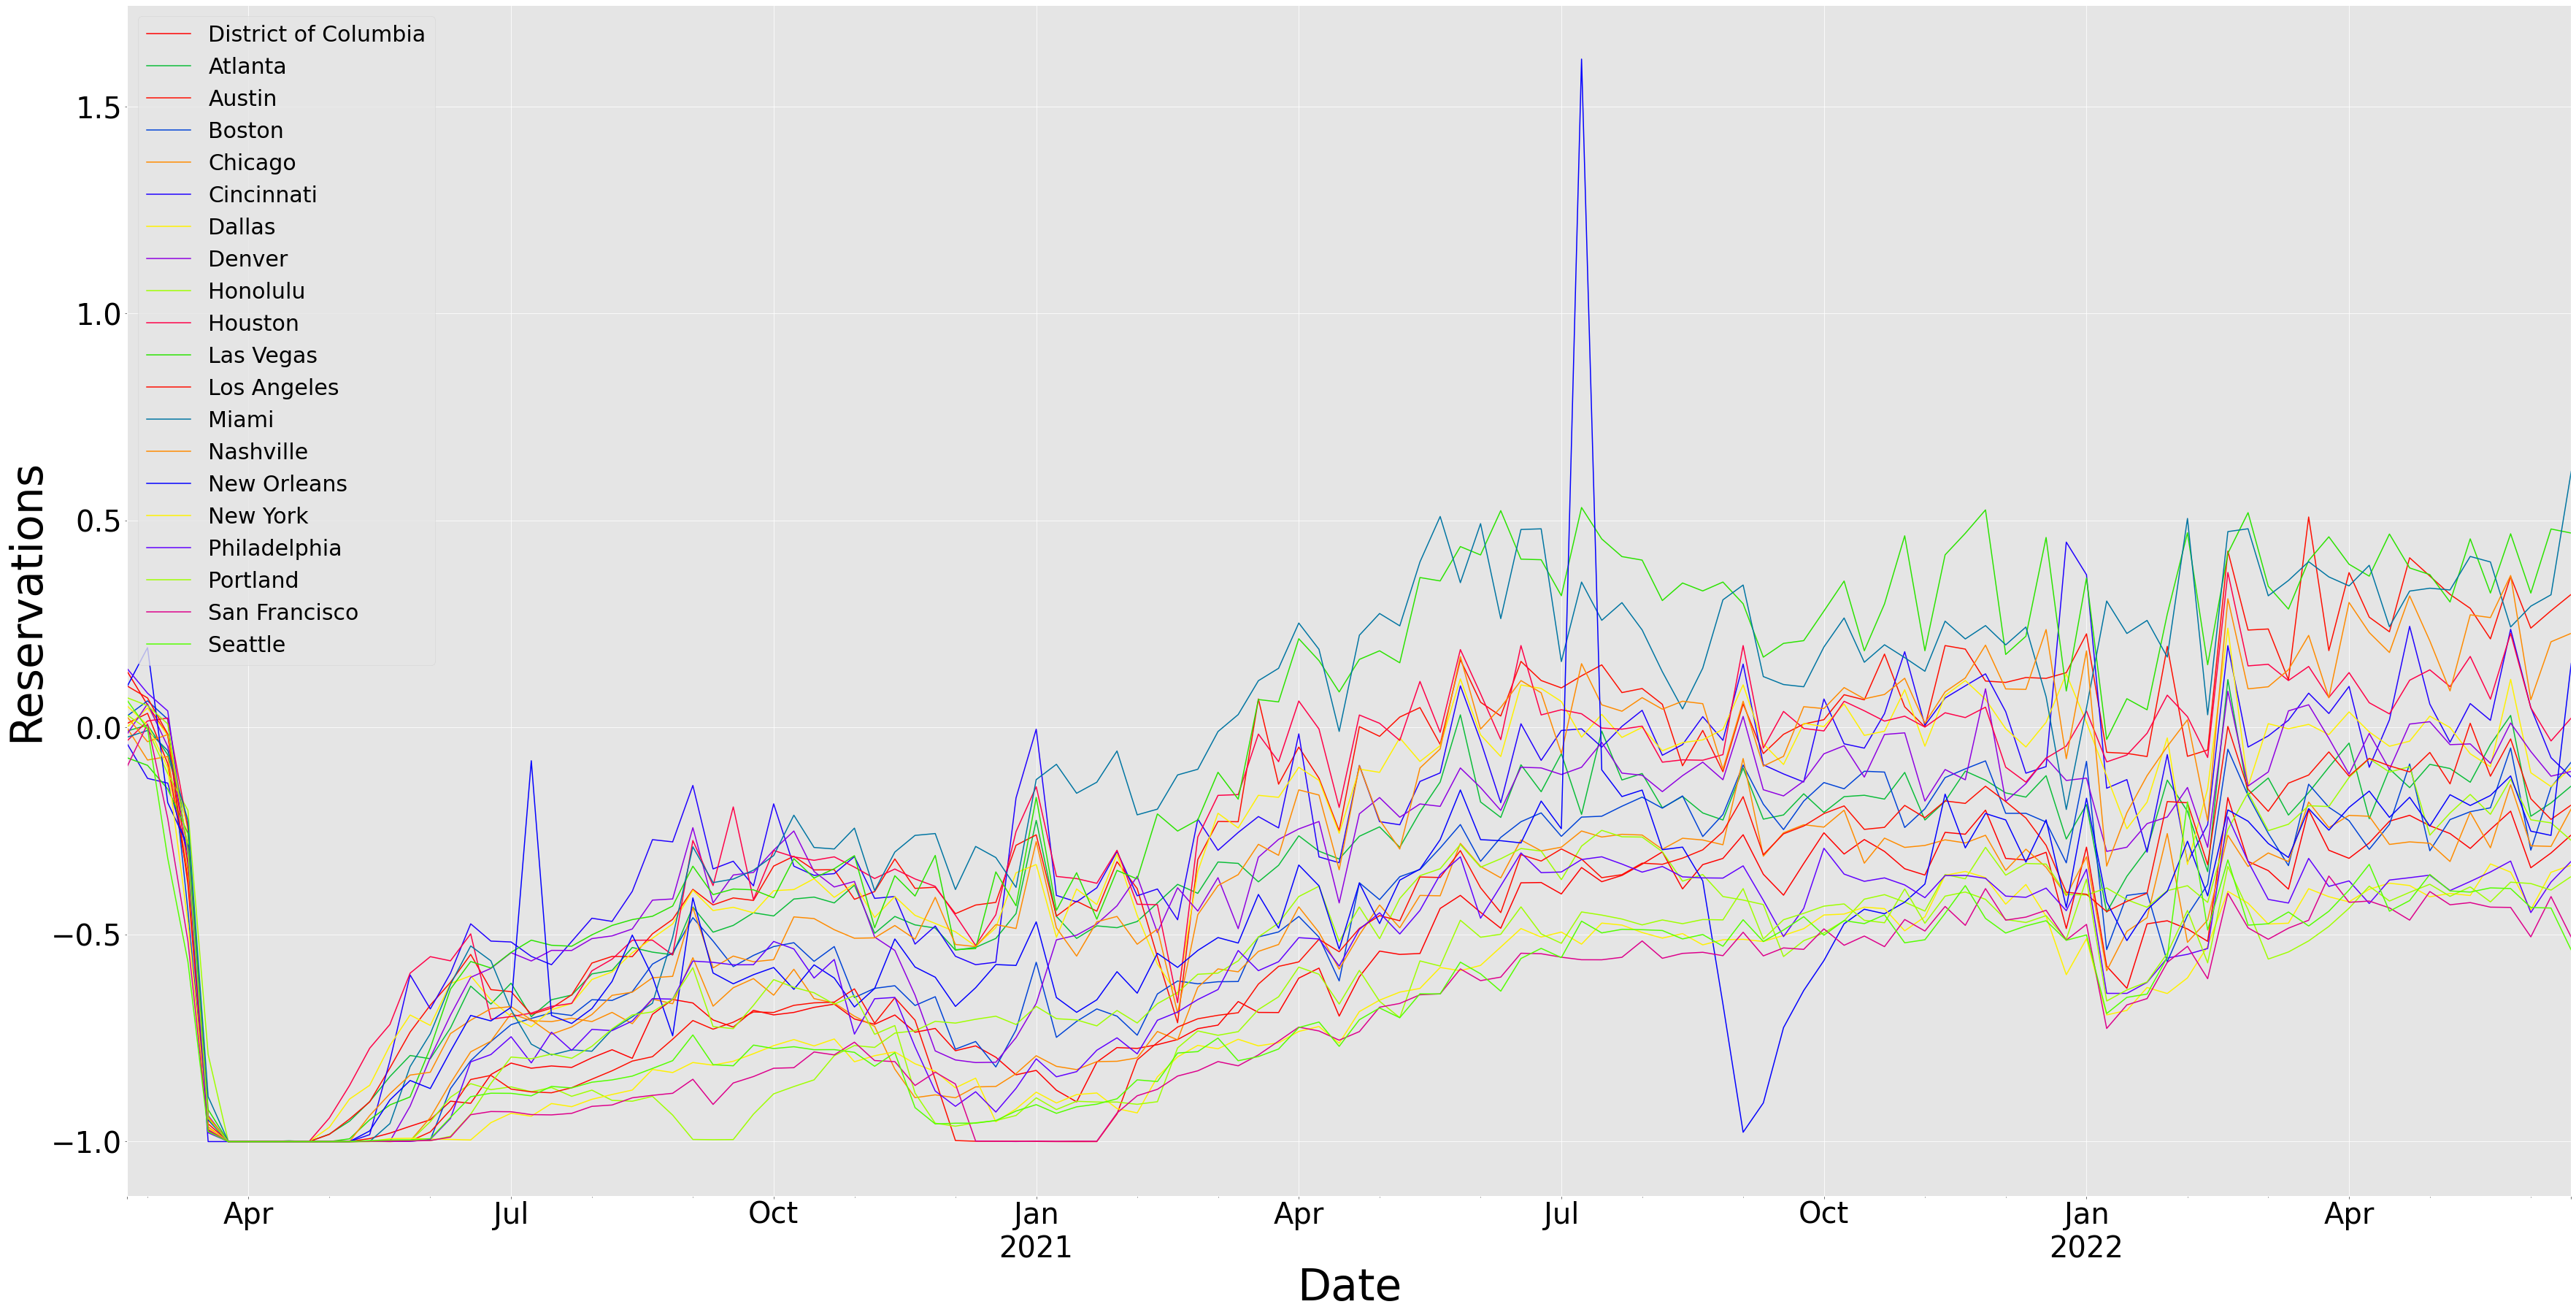

In [24]:
# Plot reservations for all cities  
df_week.plot(figsize=(60, 30), colormap = 'prism')
plt.xlabel("Date", fontsize=60, color = 'black')
plt.ylabel("Reservations",fontsize=60, color = 'black')
plt.xticks(fontsize = 40, color = 'black')
plt.yticks(fontsize = 40, color = 'black')
plt.legend(fontsize = 30, loc = 2)
plt.show()

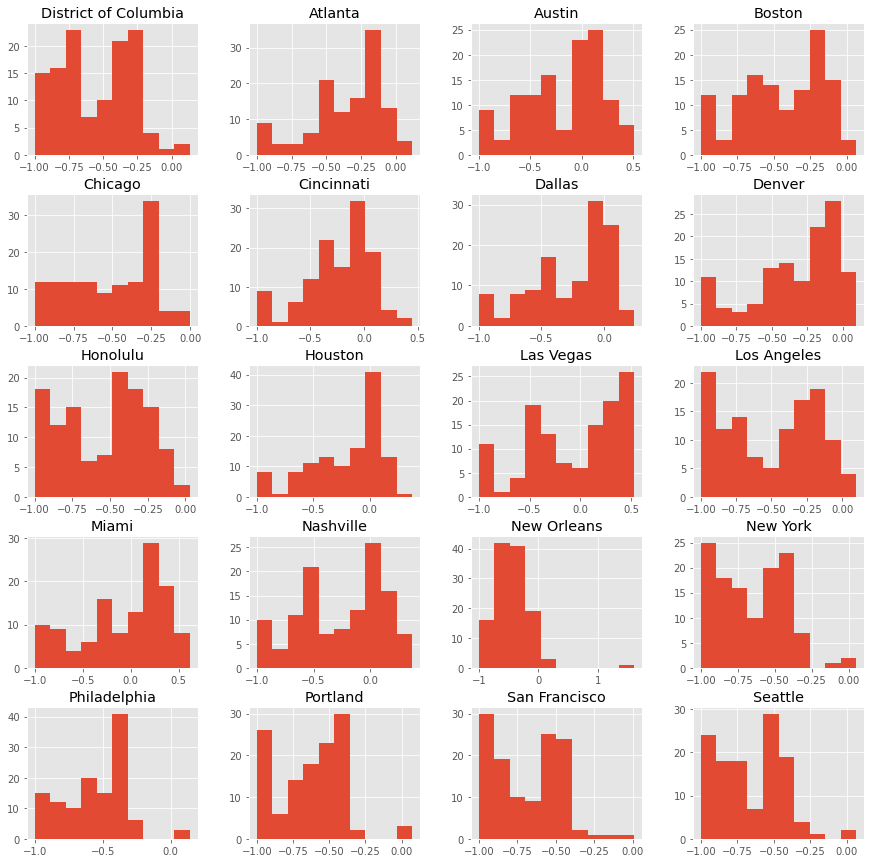

In [25]:
df_week.hist(figsize=(15, 15))
plt.show()

In [26]:
#the cities that have histograms with values above 0 are cities
#that have (at any point) had more reservations YOY since 2019 

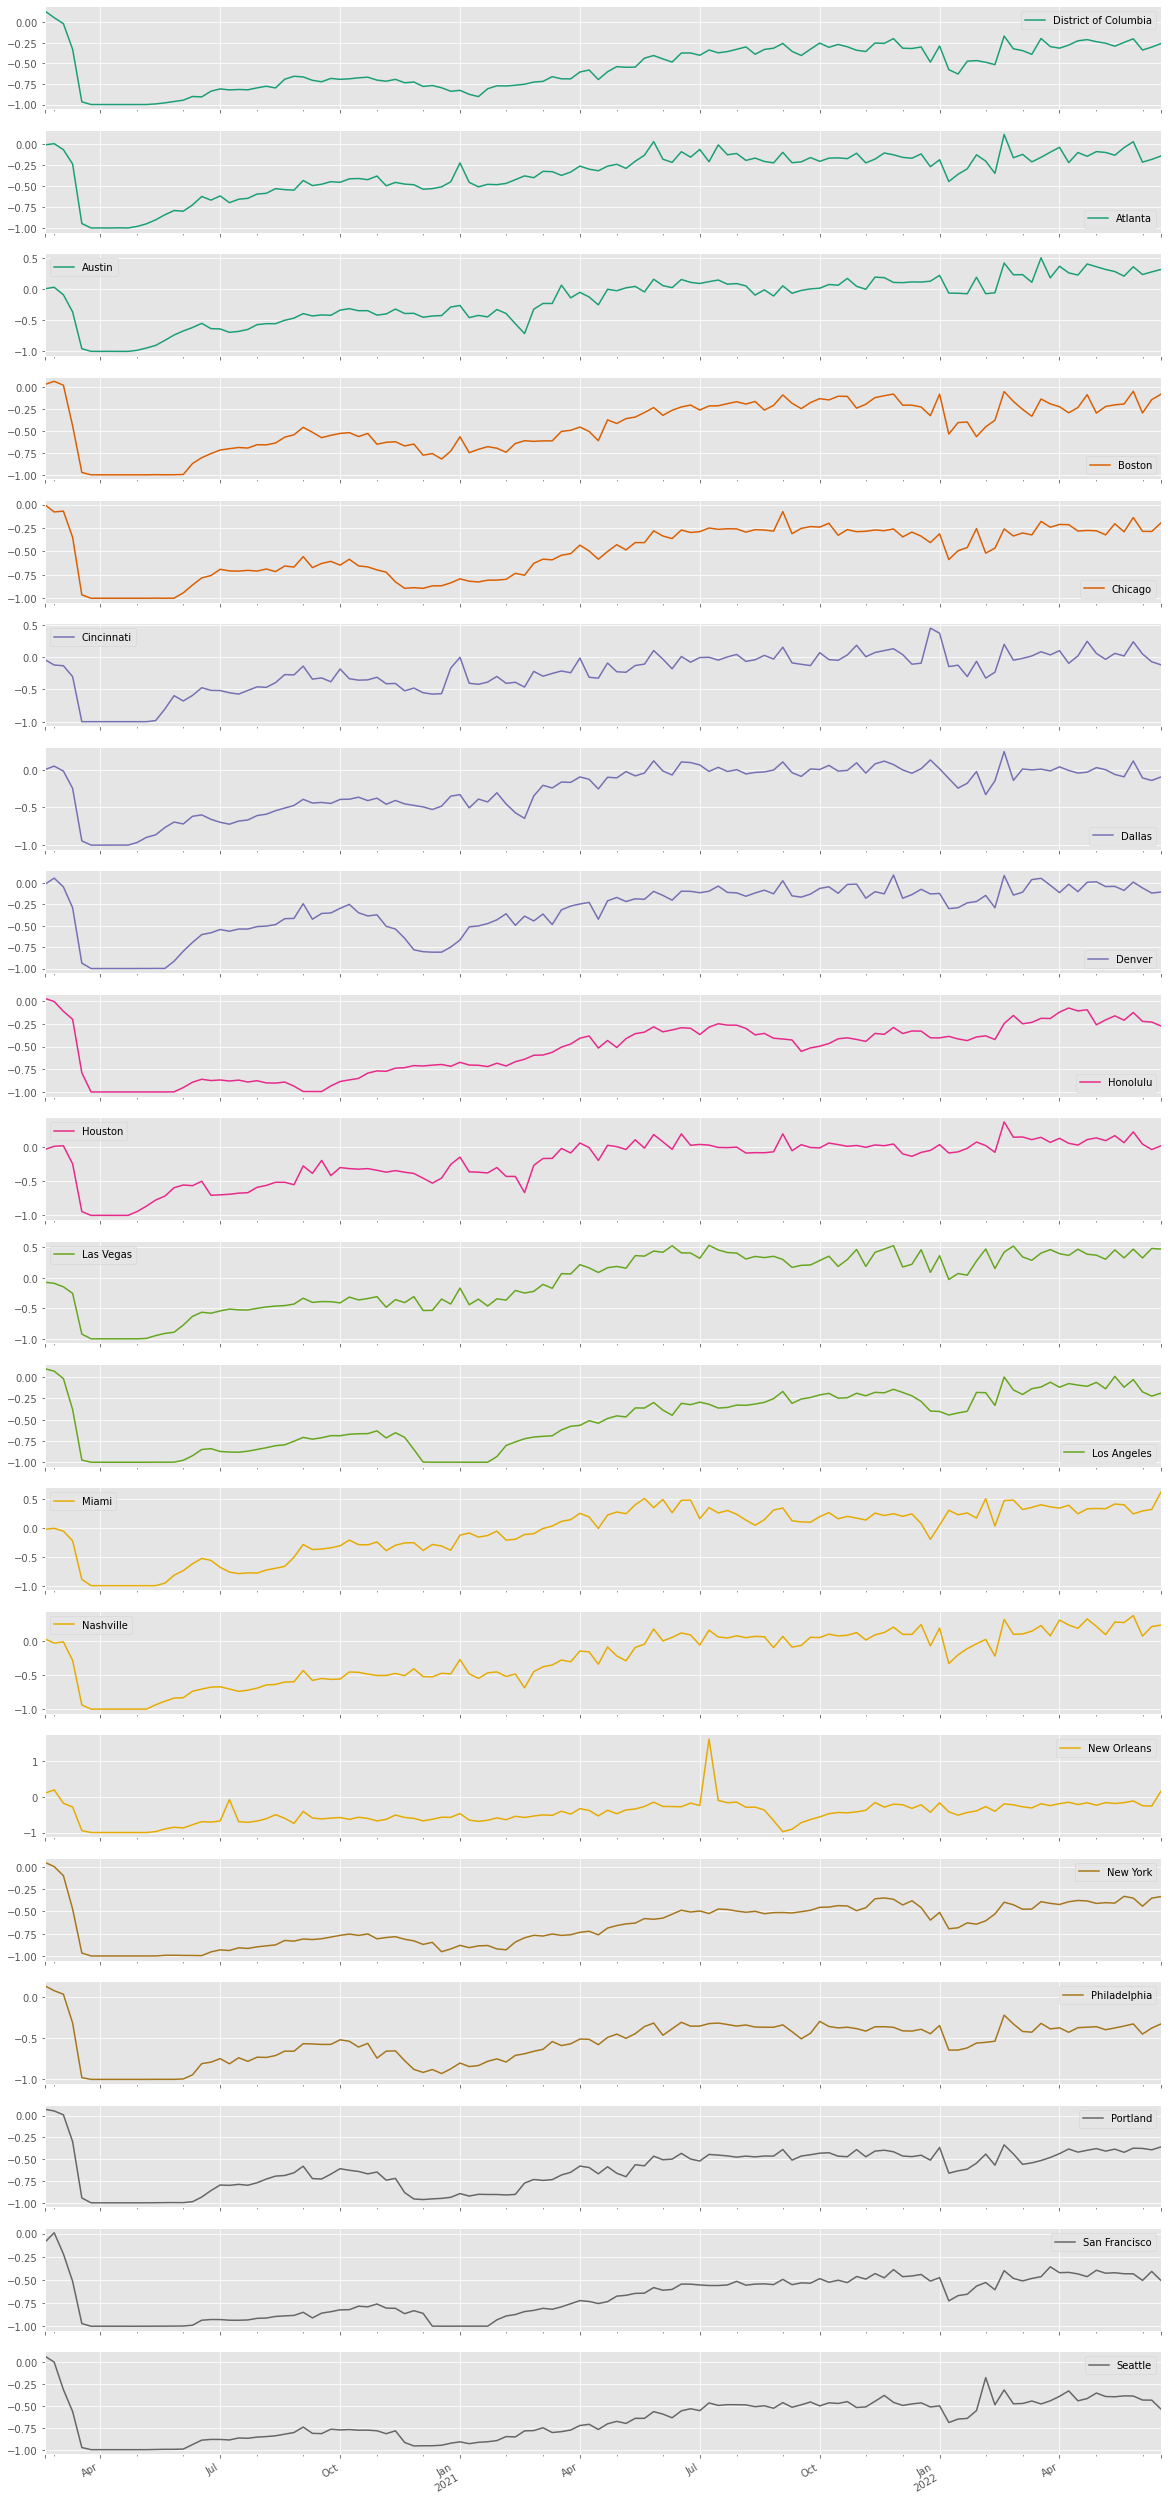

In [27]:
df_week.plot(figsize=(20, 50), colormap = 'Dark2', subplots=True)
plt.show()

## Dicky Fuller test

In [28]:
adf_results = {}
for col in df_week.columns.values:  
    adf_results[col] = tsa.adfuller(df_week[col])

adf_results

{'District of Columbia': (-1.4781398595509898,
  0.5442961960131523,
  6,
  115,
  {'1%': -3.4885349695076844,
   '5%': -2.887019521656941,
   '10%': -2.5803597920604915},
  -275.7665081155417),
 'Atlanta': (-2.0457581877488566,
  0.2668768824533572,
  3,
  118,
  {'1%': -3.4870216863700767,
   '5%': -2.8863625166643136,
   '10%': -2.580009026141913},
  -226.07647628032123),
 'Austin': (-1.2933536501069496,
  0.6322075145943183,
  2,
  119,
  {'1%': -3.4865346059036564,
   '5%': -2.8861509858476264,
   '10%': -2.579896092790057},
  -161.2827365211234),
 'Boston': (-1.9184337870075352,
  0.3234395817795742,
  5,
  116,
  {'1%': -3.4880216384691867,
   '5%': -2.8867966864160075,
   '10%': -2.5802408234244947},
  -213.7348082178347),
 'Chicago': (-1.7507620086339941,
  0.40516617194372895,
  6,
  115,
  {'1%': -3.4885349695076844,
   '5%': -2.887019521656941,
   '10%': -2.5803597920604915},
  -266.7958353392496),
 'Cincinnati': (-2.212032477471091,
  0.20190738218114135,
  7,
  114,
  {'1

In [29]:
# loop over dictionary data
non_stationary = []
stationary = []
for key, value in adf_results.items():
    if value[1] > 0.05:
        non_stationary.append(key)
    else:
        stationary.append(key)
print (non_stationary)
print (stationary)

['District of Columbia', 'Atlanta', 'Austin', 'Boston', 'Chicago', 'Cincinnati', 'Dallas', 'Denver', 'Honolulu', 'Houston', 'Las Vegas', 'Los Angeles', 'Miami', 'Nashville', 'New York', 'Philadelphia', 'San Francisco', 'Seattle']
['New Orleans', 'Portland']


In [30]:
df_week['Atlanta']

2020-02-23   -0.01
2020-03-01    0.01
2020-03-08   -0.07
2020-03-15   -0.24
2020-03-22   -0.95
2020-03-29   -1.00
2020-04-05   -1.00
2020-04-12   -1.00
2020-04-19   -1.00
2020-04-26   -1.00
2020-05-03   -0.98
2020-05-10   -0.95
2020-05-17   -0.90
2020-05-24   -0.84
2020-05-31   -0.79
2020-06-07   -0.80
2020-06-14   -0.73
2020-06-21   -0.62
2020-06-28   -0.67
2020-07-05   -0.62
2020-07-12   -0.70
2020-07-19   -0.66
2020-07-26   -0.65
2020-08-02   -0.60
2020-08-09   -0.59
2020-08-16   -0.53
2020-08-23   -0.54
2020-08-30   -0.55
2020-09-06   -0.43
2020-09-13   -0.49
2020-09-20   -0.48
2020-09-27   -0.45
2020-10-04   -0.46
2020-10-11   -0.41
2020-10-18   -0.41
2020-10-25   -0.42
2020-11-01   -0.38
2020-11-08   -0.50
2020-11-15   -0.46
2020-11-22   -0.48
2020-11-29   -0.48
2020-12-06   -0.54
2020-12-13   -0.53
2020-12-20   -0.51
2020-12-27   -0.45
2021-01-03   -0.22
2021-01-10   -0.46
2021-01-17   -0.51
2021-01-24   -0.48
2021-01-31   -0.48
2021-02-07   -0.47
2021-02-14   -0.42
2021-02-21  